# Import packages

In [1]:
try:
    from requests_html import HTMLSession
except: 
    !pip install requests_html
    from requests_html import HTMLSession
    
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

try:
    from Stockie.stockie import stockie
except:
    !pip install stockie
    !pip install seaborn
    from Stockie.stockie import stockie

try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

try:
    from mplfinance.original_flavor import candlestick_ohlc
except:
    !pip install mplfinance
    from mplfinance.original_flavor import candlestick_ohlc
    
try:
    import plotly.graph_objects as go
    import plotly.subplots as ms
except:
    !pip install plotly
    import plotly.graph_objects as go
    import plotly.subplots as ms
    
try:
    from datetime import datetime
except:
    !pip install datetime
    from datetime import datetime
try:
    from ta import add_all_ta_features
    from ta.utils import dropna
except:
    !pip install ta 
    from ta import add_all_ta_features
    from ta.utils import dropna    
try:
    from scipy.signal import savgol_filter as smooth
except:
    !pip install scipy
    from scipy.signal import savgol_filter as smooth

try:
    import trendln
except:
    !pip install trendln
    import trendln

try:
    import investpy
except:
    !pip install investpy
    import investpy
try:
    import time
except:
    !pip install time
    import time

try:
    import quandl
except:
    !pip install quandl
    import quandl
    
try:
    import json
except:
    !pip install json
    import json
    
try:
    import requests
except:
    !pip install requests
    import requests

try:
    from bs4 import BeautifulSoup
except:
    !pip install bs4
    from bs4 import BeautifulSoup
    
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/Users/vahid/myenv/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


# Define functions

In [2]:
# Get market info from INGSPRINTER
def market_info(market):
    market = market.replace('(', '')
    market = market.replace(')', '')
    market = market.replace(' ', '-')

    url = 'https://www.ingsprinters.nl/sprinters/' + market

    r = HTMLSession().get(url)

    value = r.html.find('span', clean=True)
    
    return float(value[4].text.strip().replace('.', '').replace(',', '.'))

def sprinter_list(market):
    
    url = 'https://www.ingsprinters.nl/zoeken?q=' + market

    r = HTMLSession().get(url)

    payload = {}
    data = r.html.find('a.fill-cell', clean=True)


    for item in data:
        if 'long'.capitalize() in item.text:
            payload[item.text] = re.sub(r'.*/NL', 'NL', item.attrs["href"])
        if 'short'.capitalize() in item.text:
            payload[item.text] = re.sub(r'.*/NL', 'NL', item.attrs["href"])

    return payload

In [3]:
def market_info(market):
    market = market.replace('(', '')
    market = market.replace(')', '')
    market = market.replace(' ', '-')

    url = 'https://www.ingsprinters.nl/sprinters/' + market

    r = HTMLSession().get(url)

    value = r.html.find('span', clean=True)
    
    return float(value[4].text.strip().replace('.', '').replace(',', '.'))



In [4]:
market_info('AEX'), datetime.now()

(768.39, datetime.datetime(2021, 8, 8, 23, 40, 22, 403122))

# Macroeconomimcs

## US Consumer Price Index for All Urban Consumers: All Items Less Food and Energy

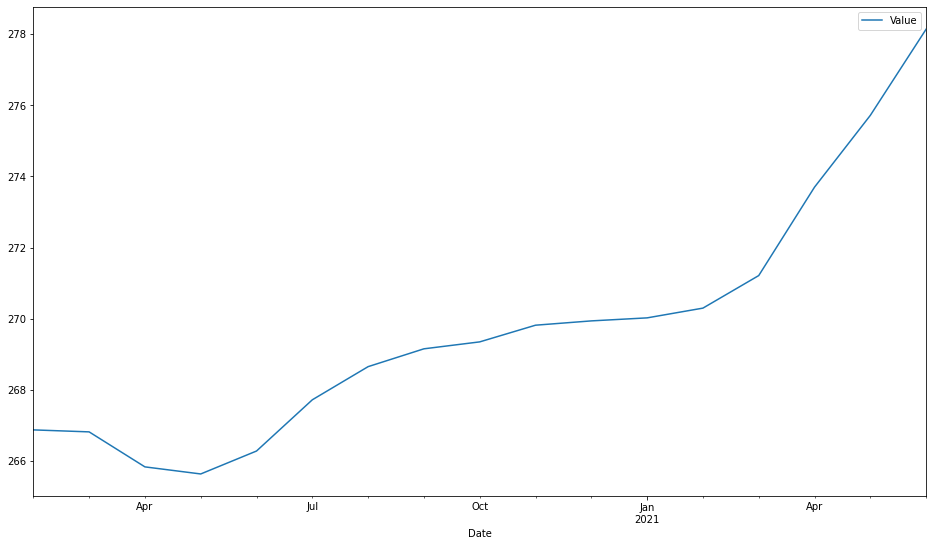

In [5]:
df=quandl.get("FRED/CPILFESL")
df[df.index > '2020-01-01'].plot(y=['Value'], figsize=(16, 9));

## US Effective Federal Funds Rate

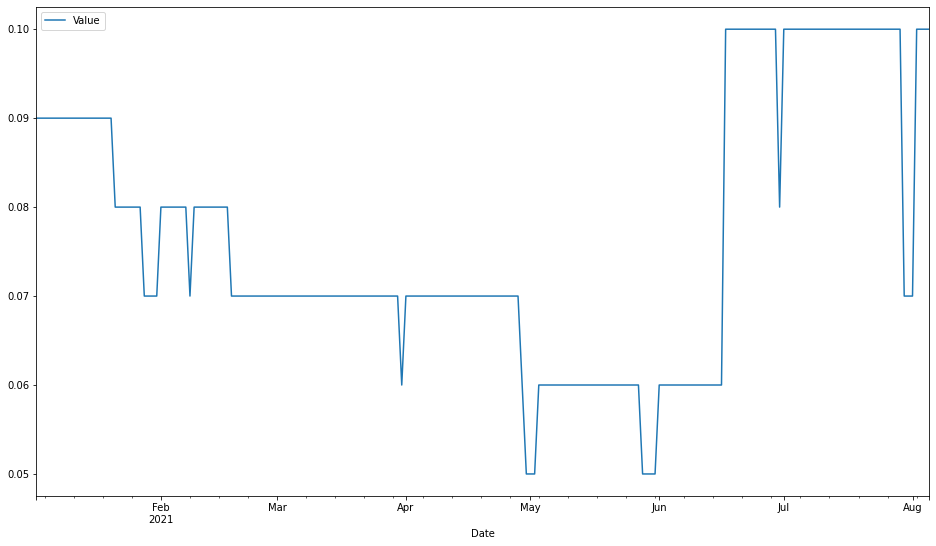

In [6]:
df=quandl.get("FRED/DFF")
df[df.index > '2021-01-01'].plot(y=['Value'], figsize=(16, 9));

## US Consumer Price Index for All Urban Consumers: All Items

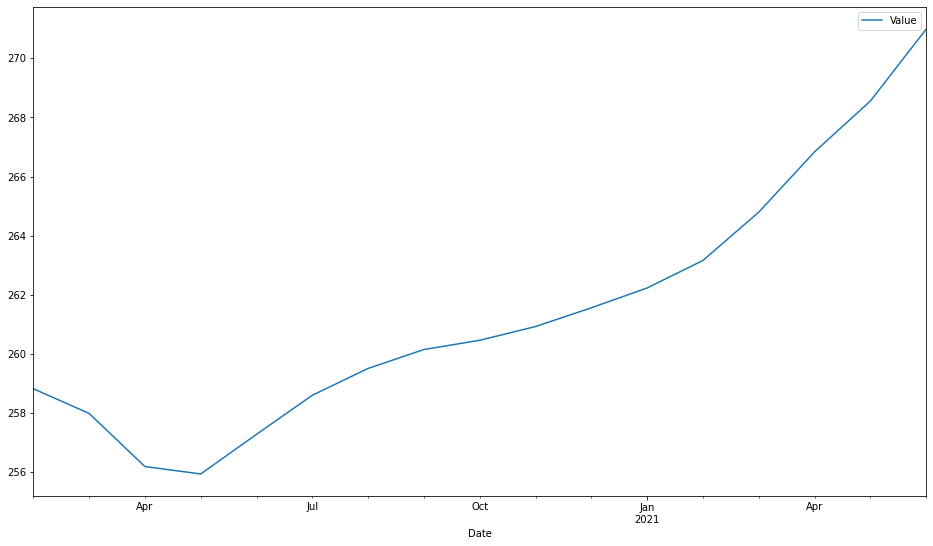

In [7]:
df=quandl.get("FRED/CPIAUCSL")
df[df.index > '2020-01-01'].plot(y=['Value'], figsize=(16, 9));

## Gold

[*********************100%***********************]  1 of 1 completed


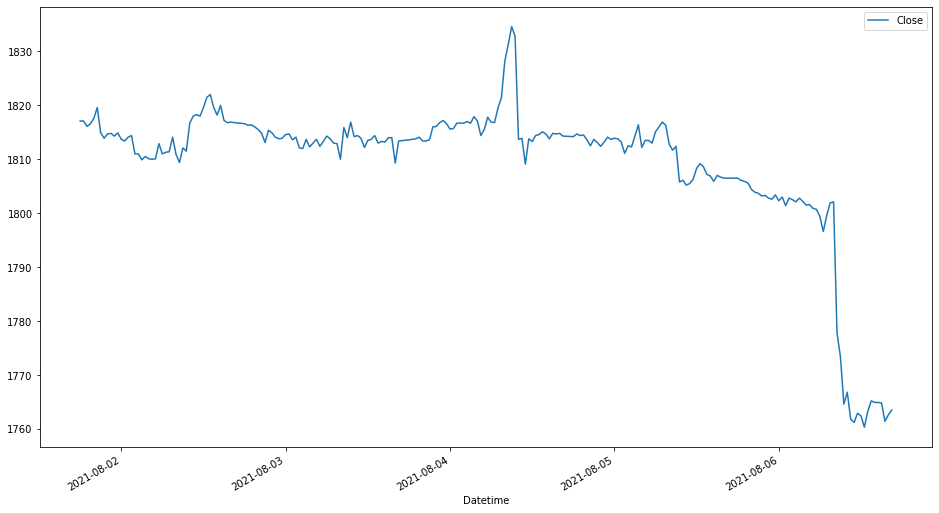

In [8]:
TNX_data = yf.download('GC=F', period='1wk', interval = "30m");
TNX_data.plot(y=['Close'], figsize=(16,9));

## Crude Oil Sep 21

[*********************100%***********************]  1 of 1 completed


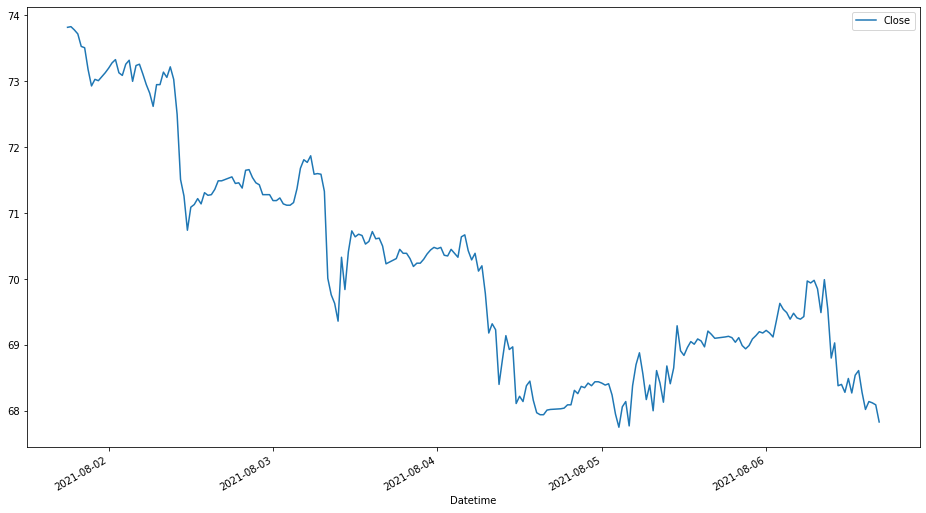

In [9]:
TNX_data = yf.download('CL=F', period='1wk', interval = "30m");
TNX_data.plot(y=['Close'], figsize=(16,9));

## Bitcoin - USD

[*********************100%***********************]  1 of 1 completed


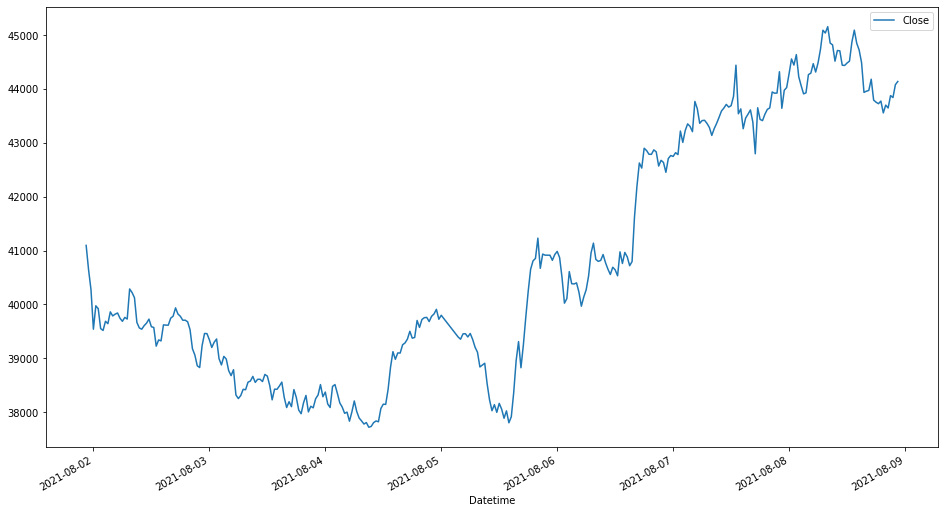

In [10]:
TNX_data = yf.download('BTC-USD', period='1wk', interval = "30m");
TNX_data.plot(y=['Close'], figsize=(16,9));

## Ethereum USD

[*********************100%***********************]  1 of 1 completed


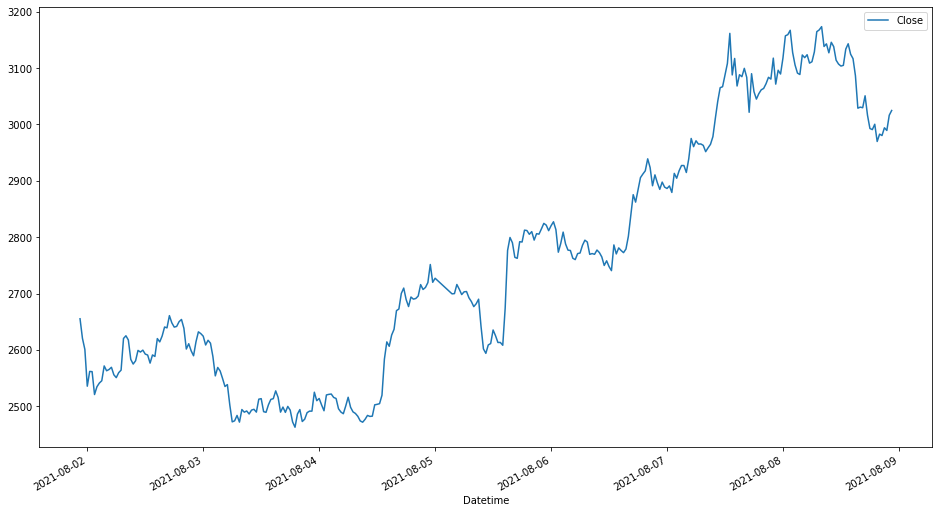

In [11]:
TNX_data = yf.download('ETH-USD', period='1wk', interval = "30m");
TNX_data.plot(y=['Close'], figsize=(16,9));

## US Treasury Yield 10 Years 

[*********************100%***********************]  1 of 1 completed


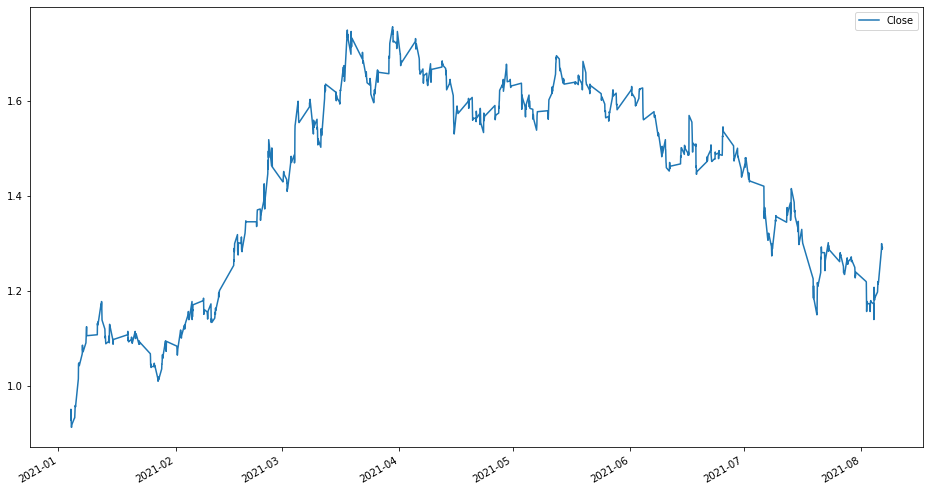

In [12]:
TNX_data = yf.download('^TNX', period='ytd', interval="1h");
TNX_data.plot(y=['Close'], figsize=(16, 9));

## US first time jobless claim

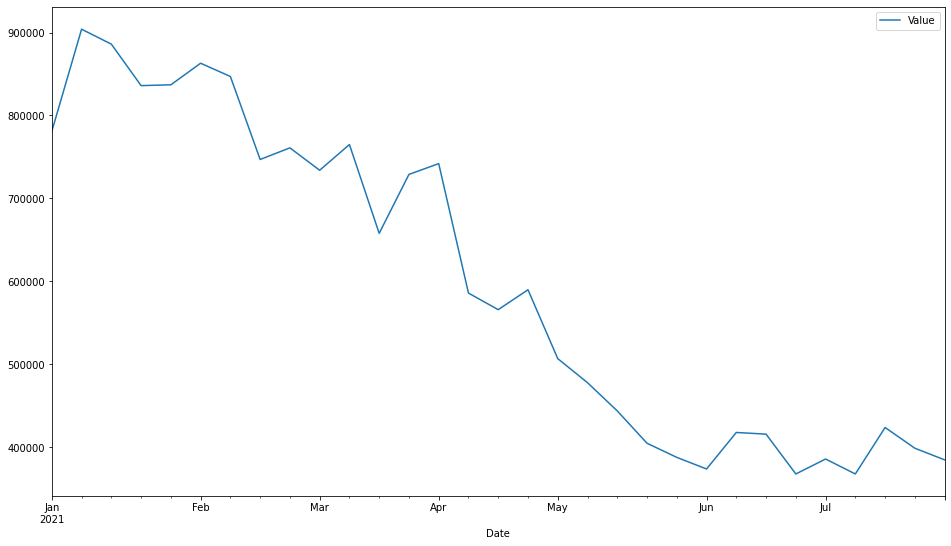

In [13]:
df = quandl.get("FRED/ICSA")
df[df.index > '2021-01-01'].plot(y=['Value'], figsize=(16, 9));

## Germany 10-Year Bond Yield Overview

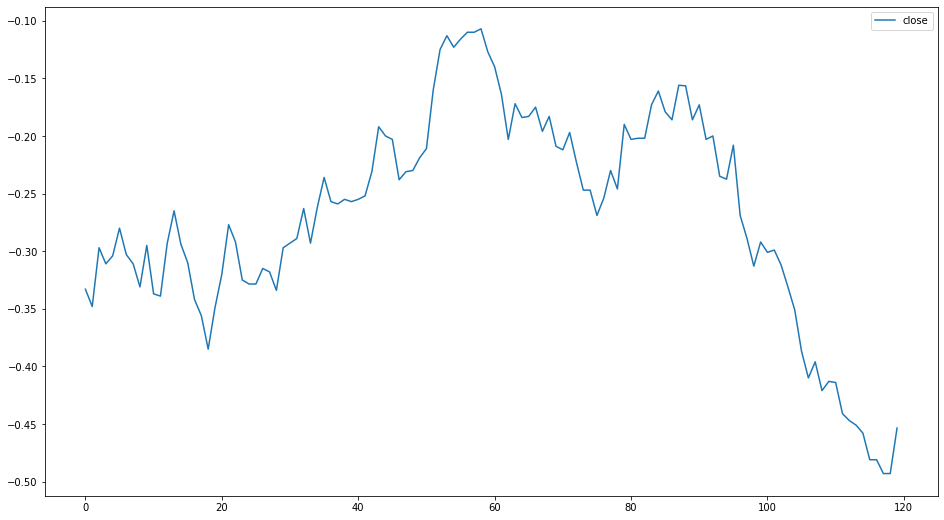

In [14]:
url = 'https://www.investing.com/common/modules/js_instrument_chart/api/data.php?pair_id=23693&pair_id_for_news=23693&chart_type=candlestick&pair_interval=86400&candle_count=120&events=yes&volume_series=yes&period='
headers = {
    'User-Agent':
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer':
    'https://www.investing.com/rates-bonds/germany-10-year-bond-yield'
}
data = requests.get(url, headers=headers).json()

df = pd.DataFrame(
    data['candles'],
    columns=['date_time', 'open', 'high', 'low', 'close', 'volume', 'zero'])
df['date_time'] = df.apply(
    lambda x: datetime.fromtimestamp(x['date_time'] // 1000), axis=1)
df.plot(y=['close'], figsize=(16, 9));

# Settings:

In [15]:
# Define end of time of refresh = '17:40'
Euro_market_open_time = '08:00'
Euro_market_close_time = '17:40'

# Index List
watchlist = ['DAX', 'NASDAQ'] #,'Dow Jones', 'S&P 500', 'AEX', 'CAC40'
# Indexes tickeres per library
ticker_list = {
    'DAX': {
        'yfinance': '^GDAXI',
        'investpy': 'dax',
        'country': 'germany'
    },
    'NASDAQ': {
        'yfinance': '^IXIC',
        'investpy': 'nasdaq',
        'country': 'united states'
    }
}
#[dax, nasdaq] + [dow jones + s&p 500] + [aex + cac40]

# prepare df for data from ingsprinter + save time to time as csv
# refresh time - indicator update / rate update
# indicator list
# boundary list

In [16]:
data = investpy.get_index_historical_data(index='nasdaq',
                                          country='united states',
                                          from_date='01/01/2021',
                                          to_date='31/12/2021')
data

Open     High      Low    Close      Volume Currency
Date                                                               
2021-01-04  12958.5  12958.7  12543.2  12698.4  1270119040      USD
2021-01-05  12665.7  12828.3  12665.6  12819.0  1210781056      USD
2021-01-06  12666.2  12909.6  12650.0  12740.8  1452038016      USD
2021-01-07  12867.3  13090.9  12867.3  13067.5  1253074048      USD
2021-01-08  13160.2  13208.1  13036.5  13202.0  1333527040      USD
...             ...      ...      ...      ...         ...      ...
2021-08-02  14758.6  14770.4  14665.7  14681.1   752760000      USD
2021-08-03  14714.0  14762.6  14584.1  14761.3   831950016      USD
2021-08-04  14747.2  14812.4  14734.1  14780.5   875560000      USD
2021-08-05  14794.1  14896.5  14776.0  14895.1   842720000      USD
2021-08-06  14864.2  14890.2  14788.6  14835.8   817600000      USD

[150 rows x 6 columns]

# Analysis

In [17]:
# load Monthly, weekly, daily data of indexes

In [18]:
# Give update on last 15 mins of 10Y US and germany treasury
# load 4 hour, 1 hour, 30 min, 15 min, 5 mins data of indexes [candlestick, volume, indicators, boundaries]
# calculate the rolling average (5) per all 
# present all data in a dataframe 
# recognize the candlestick patterns
# Draw ing sprinter and investing rates on one chart + volume
# refresh to get the index from ingsprinter and show 
# save in csv the refresh thing (if it is not in colab google)

In [19]:
while datetime.now().strftime('%H:%M') < Euro_market_close_time:  
    print(datetime.now().strftime('%H:%M'))
    time.sleep(15)

In [20]:
def executeSomething():
    a=datetime.now()
    print(market_info('AEX'), datetime.now())
    b=datetime.now()
    time.sleep(6-(b-a).total_seconds())
    
i=0
while i<3:
    executeSomething()
    i=i+1


768.39 2021-08-08 23:40:34.585010
768.39 2021-08-08 23:40:40.319924
768.39 2021-08-08 23:40:46.269145


# Effectiveness of indicators - backtesting